In [62]:
import numpy as np
import pandas as pd

import scipy
import statsmodels

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
plt.rcParams['figure.figsize'] = 10,8

In [64]:
data = pd.read_csv("dataset_with_score.csv")

In [65]:
data.shape

(203, 32)

In [66]:
oldName_to_newName = {
    'id': 'id',
    'Where do you live? (name of village/town/city)': 'P1',
    'Do you live in a rural or urban area?': 'P2',
    'Sex': 'P3',
    'Age': 'P4',
    'Your medium of schooling': 'P5',
    'Your highest educational qualification': 'P6',
    'Your monthly household income (in INR)': 'P7',
    'Who do you live with in your residence (i.e., where you currently reside)? ': 'P8',
    "Your father's highest educational qualification": 'P9',
    "Your mother's highest educational qualification": 'P10',
    'Who is responsible for making day-to-day decisions about money in your household?': 'F1',
    'Do you prepare a budget to keep track of necessary expenses and savings?': 'F2',
    'How do you keep track of your monthly expenses?': 'F3',
    'In the past 12 months have you been personally saving money in any of the following ways?': 'F4',
    'What percentage of your total monthly income (or allowance) do you keep aside for active savings?': 'F5',
    'What do you usually do to grow the money that you manage to save each month?': 'F6',
    'If you lost your main source of income today, how long would you be able to continue your current living expenses without borrowing money or moving house?': 'F7',
    'In the last 12 months have you done the following?': 'S1',
    'For an online payment that has to be made by card, which one would you opt for generally?': 'A1',
    'You are looking to buy new headphones online and you have 2 choices, out of which you need to choose one. The first set of headphones are priced at ₹700, while the other set is marked at ₹1,000 with a 30% discount. Both the sets are similar in terms of quality, performance, and durability.': 'A2',
    'From the list given below, identify items that are classified as assets:': 'K1',
    "Suppose you buy a piece of land for  ₹5 lakhs. After 10 years, you sell this land for ₹7 lakhs. How much would your profit be after selling the land? (Assume you don't have to pay any kind of taxes)": 'K2',
    'You have borrowed ₹100 from a friend. Which would be the lower amount to pay back: ₹105 or ₹100 plus 3%?': 'K3',
    'Assume that the income tax rate for an annual income between ₹1 lakh and ₹2 lakhs is 5% and for an annual income between ₹2 lakhs and ₹4 lakhs, the income tax rate is 10%. If your annual income is ₹3 lakhs, your income tax would be:': 'K4',
    'You want to buy a phone worth ₹25,000 and you decide to save ₹5,000 each month. In your third month of savings period (which would be of 5 months), a relative gifts you ₹4,000 in form of cash. What would you most likely do with this money?' : 'K5',
    'Just when you were about to reach your target of saving ₹25,000 for your new phone, you hear about another new, different model worth ₹22,000 and see a huge number of people booking it, along with good recommendations from a lot of well known experts and analysts.': 'K6',
    "You have ₹200 to spend on lunch and you're hungry. You buy some food items worth ₹180 and you feel full again after eating. You are now left with ₹20 of your lunch budget. What are you most likely to do?": 'K7',
    'Which one of the following investments do you consider as safer: putting your entire money in one business/investment, or putting your money into multiple businesses/investments?': 'K8',
    "You lend Rs. 25 to a friend and they return you Rs. 25 the next day. How much interest did they pay on this loan?": 'K9',
    "Say someone puts Rs. 100 into a tax free, no fee savings account with guaranteed interest is 2% per year. What will be the amount in the account after 5 years?": 'K10',
    "Suppose 5 brothers are given Rs. 1000 and asked to divide among themselves. However they have to wait for a year to get the money. If inflation stays at X%, then in 1 year will they be able to buy": 'K11'
}
newName_to_oldName = {item[1]: item[0] for item in oldName_to_newName.items()}

<AxesSubplot:xlabel='TOTAL', ylabel='count'>

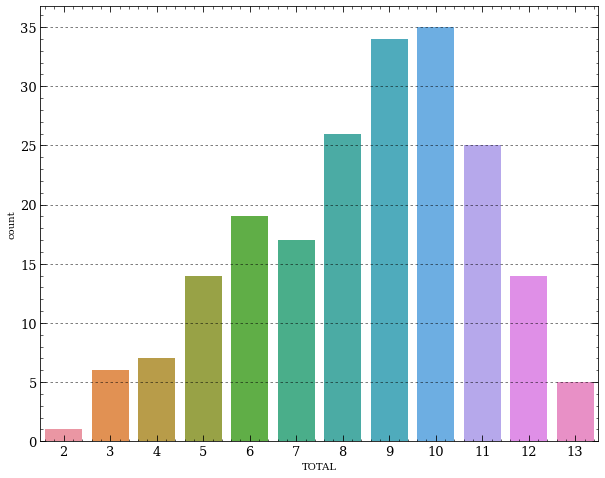

In [67]:
sns.countplot(data=data, x='TOTAL')

# Pivot tables

1. age group vs literacy

In [68]:
data['P11'] = pd.cut(data['P4'], bins=[18,21,24,27,30,33,36], include_lowest=True, right=False)

In [75]:
agegrp_literacy = pd.pivot_table(data, columns='TOTAL', index='P11', aggfunc='count').iloc[:,:12]
agegrp_literacy.index = ["[18, 21)","[21, 24)","[24, 27)","[27, 30)","[30, 33)","[33, 36)"]
agegrp_literacy.columns = [f"{i}" for i in range(2,14)]
agegrp_literacy

,2,3,4,5,6,7,8,9,10,11,12,13
"[18, 21)",1,1,2,9,4,6,9,7,8,4,3,1
"[21, 24)",0,4,4,3,13,11,16,24,23,19,11,2
"[24, 27)",0,0,0,1,2,0,0,1,1,1,0,1
"[27, 30)",0,0,0,0,0,0,0,2,2,0,0,0
"[30, 33)",0,0,1,0,0,0,0,0,0,0,0,0
"[33, 36)",0,1,0,1,0,0,1,0,1,1,0,1


2. proportion of age groups:

In [70]:
data['P11'].value_counts()

[21, 24)    130
[18, 21)     55
[24, 27)      7
[33, 36)      6
[27, 30)      4
[30, 33)      1
Name: P11, dtype: int64

In [71]:
agegrp_prop = pd.DataFrame(data['P11'].value_counts())
agegrp_prop.columns = ['P12']
agegrp_prop['P12'] = agegrp_prop['P12']/203
agegrp_prop['P11'] = agegrp_prop.index
agegrp_prop.index = list(range(6))

In [72]:
agegrp_prop

,P12,P11
0,0.640394,"[21, 24)"
1,0.270936,"[18, 21)"
2,0.034483,"[24, 27)"
3,0.029557,"[33, 36)"
4,0.019704,"[27, 30)"
5,0.004926,"[30, 33)"


In [73]:
pd.merge(left=data, right=agegrp_prop, how='left', on='P11').head()

,id,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,K5,K6,K7,K8,K9,K10,K11,TOTAL,P11,P12
0,0,Urban,Female,22,Bengali,Graduate,"> 60,000",With friends. colleagues or students,Graduate,Postgraduate,...,save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,less than 110,not sure,7,"[21, 24)",0.640394
1,1,Urban,Male,22,Bengali,Graduate,"< 20,000",With friends. colleagues or students,Graduate,Graduate,...,save it,cheaper model,buy beverage,Not sure,Not sure,not sure,not sure,3,"[21, 24)",0.640394
2,2,Urban,Male,21,English,Graduate,"> 60,000","With children under the age of 18, With other ...",12th pass,12th pass,...,save it,expensive model,keep it,Multiple businesses/investment,Not sure,not sure,not sure,6,"[21, 24)",0.640394
3,3,Urban,Female,23,English,Graduate,"> 60,000",With other adult relatives,Postgraduate,Graduate,...,save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,not sure,less than today,8,"[21, 24)",0.640394
4,4,Rural,Male,21,Bengali,Graduate,"20,000 - 40,000",Alone,10th pass or less,Graduate,...,save it,cheaper model,keep it,Multiple businesses/investment,No interest,more than 110,same as today,10,"[21, 24)",0.640394
